# The Battle of Neighborhoods
<hr>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#introduction">Introduction/Business Problem</a></li>
        <ol>
            <li><a href="#problem">Problem</a></li>
            <li><a href="#similarity">Similarity</a></li>
        </ol>
        <li><a href="#data_collection">Data Collection and Data Wrangling</a></li>
        <ol>
            <li><a href="#ny_data">New York Data</a></li>
            <li><a href="#toronto_data">Toronto Data</a></li>
        </ol>
        <li><a href="#data_analysis">Data Analysis</a></li>
        <ol>
            <li><a href="#common_venues">Finding common venues in New York and Toronto</a></li>
            <li><a href="#analyze_ny">Analyze New York Data</a></li>
            <li><a href="#analyze_toronto">Analyze Toronto Data</a></li>
        </ol>
        <li><a href="#similar_neighborhood">Finding Similar Neighborhood</a></li>
        <ol>
            <li><a href="#matrix_multiplication">Matrix Multiplication</a></li>
            <li><a href="#validate_matched">Validate Matched Locations</a></li>
        </ol>
        <li><a href="#result">Results</a></li>
        <li><a href="#observation">Observations</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="introduction">
    <h2>1. Introduction/Business Problem</h2>
</div>
<div id="problem">
    <h3>a. Problem</h3>
</div>
<div>
Many people constantly seek new job opportunities within the same community they live in or across the city or even a different city itself. Let's say a person got an interesting job offer from a different city , say New York and he/she lives in Downtown Toronto currently. It would be really helpful to seek a place to live which is most similar to the current living location of that person. 
<p>Some of the popular location categories one might look for in the proximity of a living area are grocery stores, colleges or/and schools, parks, restaurants, coffee-shops, hospitals and other community areas like religious places, community halls, libraries, etc. So I’ll find out what are borough-neighborhoods that are very similar to a person's current location. </p>
<p>This information can help the person decide on which neighborhood he/she would love to live in once he/she moves to New York after accepting a new job offer.</p>
</div>

<div id="similarity">
    <h3>b. Similarity</h3>
</div>
<div>
How do we compare 2 cities and measure similarity? Fortunately, Foursquare offers venue category to each venue, this information can be used to count the number of venues for each category and compare it with all neighborhoods of New York.
</div>

<div id="data_collection">
    <h2>Data Collection and Data Wrangling</h2>
</div>
<div id="ny_data">
    <h3>a. New York Data</h3>
</div>

All the venues of New York City are available in a dataset provided by PLUTO which is a part of the Department of City Planning (DCP). It contains Burough, Latitude, Longitude for each venue in New Yor City. Using Foursquare API, we can get Neighborhood information for each venue in the dataset.
Another way to get New york city dataset is from Foursquare API with getting latitude and longitude of the center of New York City and getting all venues within a 500-mile radies and filtering out all venues with New York City as city name for the venue.


#### Data Wrangling

Below steps will be followed to clean the data from cities datasets 
1. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
2. More than one neighborhood can exist in one postal code area. Split the neighborhoods as one per line.
3. If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.


#### Step 1
<p>The initial data consists of ZipCode, Burough, Neighborhood from the source csv file or Wikipedia.</p>

Below is a total count of neighborhoods for each borough in the New York dataframe

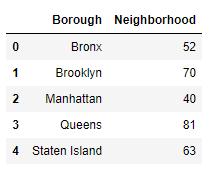

#### Step 2
Using Geolocator or the csv file provided, we can get the Latitude, Longitude of each Neighborhood.

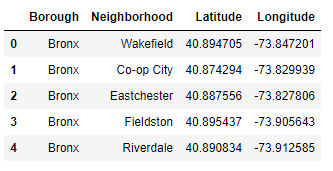

Using Folium, below is the mapping of all neighborhoods with their co-ordinates.

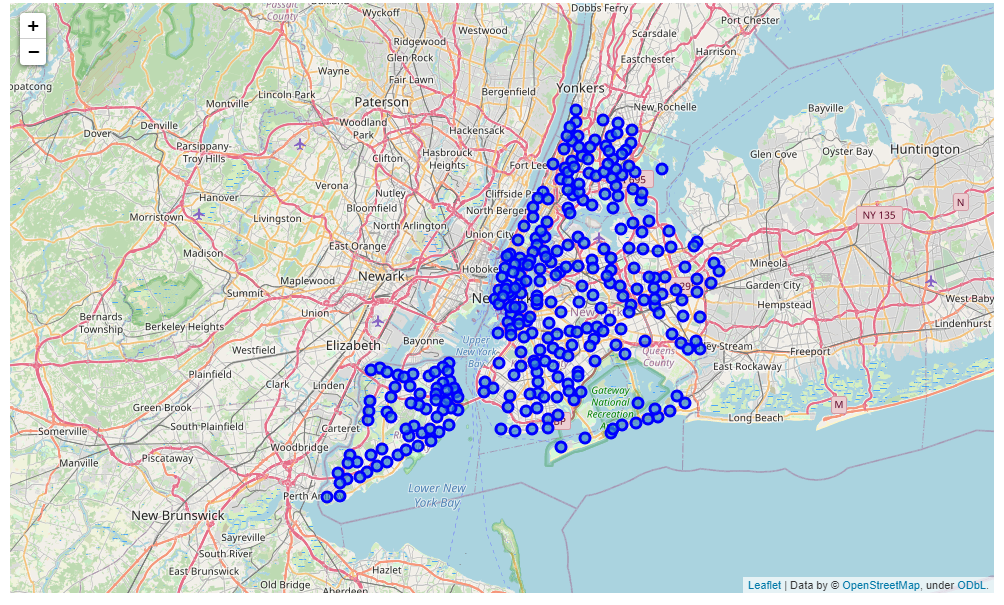

### Step 3
<p>By passing the latitude and longitude into Foursquare API, we can get venue information like <b>Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category</b></p>

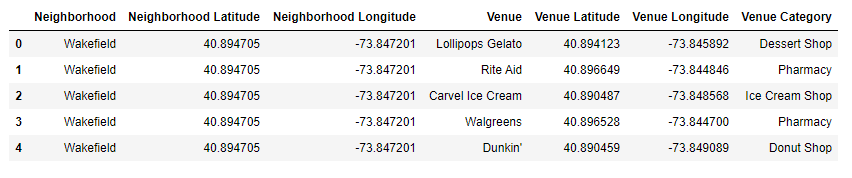

There are a total of 431 unique venue categories and 10103 venues in New York City <hr>

<div id="toronto_data">
    <h3>b. Toronto Data</h3>
</div>
A similar exercise can be done for to get all venues in Toronto by Foursquare API or as we did int he previous exercise, download the Toronto Zip Codes from Wikipedia, parse the wikipedia webpage using BeautifulSoup package. Using the geolocator or the csv file provided by the assignment, we can get latitude and longitiude for the neighborhoods and iterate through the Foursquare API to get all venues in each neighborhood.

#### Data Wrangling

Below steps will be followed to clean the data from cities datasets 
1. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
2. More than one neighborhood can exist in one postal code area. Split the neighborhoods as one per line.
3. If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.


#### Step 1
The initial data consists of ZipCode, Burough, Neighborhood from Wikipedia.

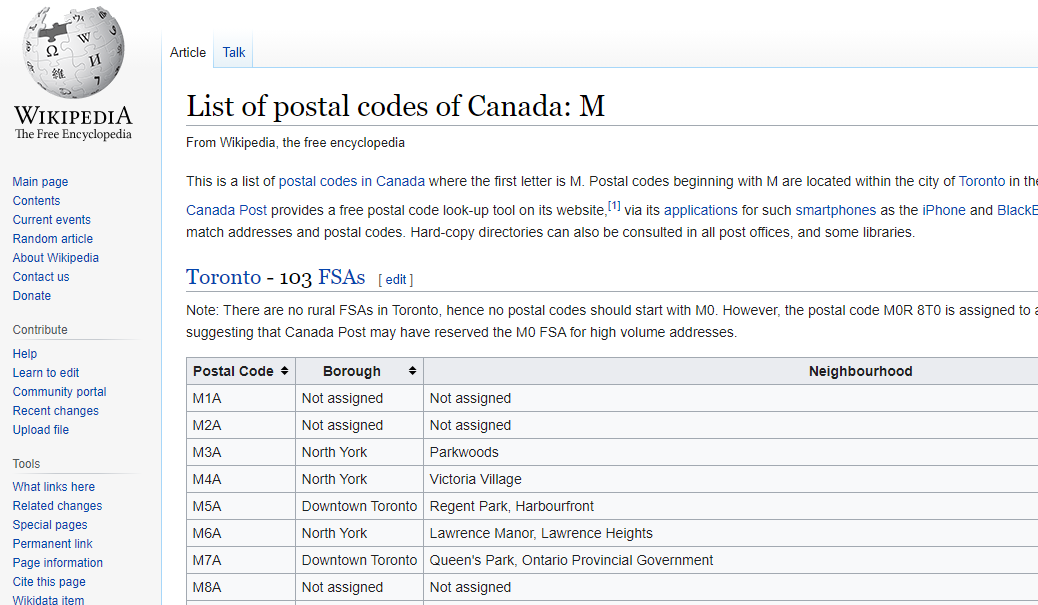

#### Step 2
Using Geolocator or the csv file provided, we can get the Latitude, Longitude of each Neighborhood.

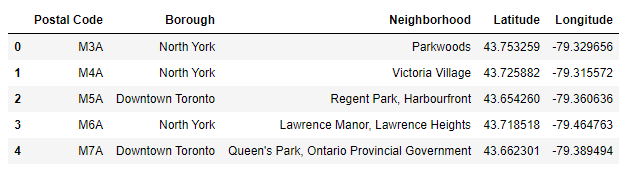

There are a total of 10 unique Boroughs and 99 Neighborhoods in Toronto

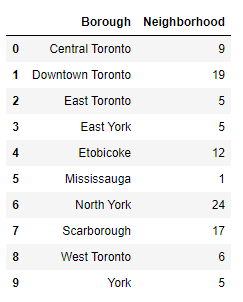


Using Folium, below is the mapping of all neighborhoods with their co-ordinates.

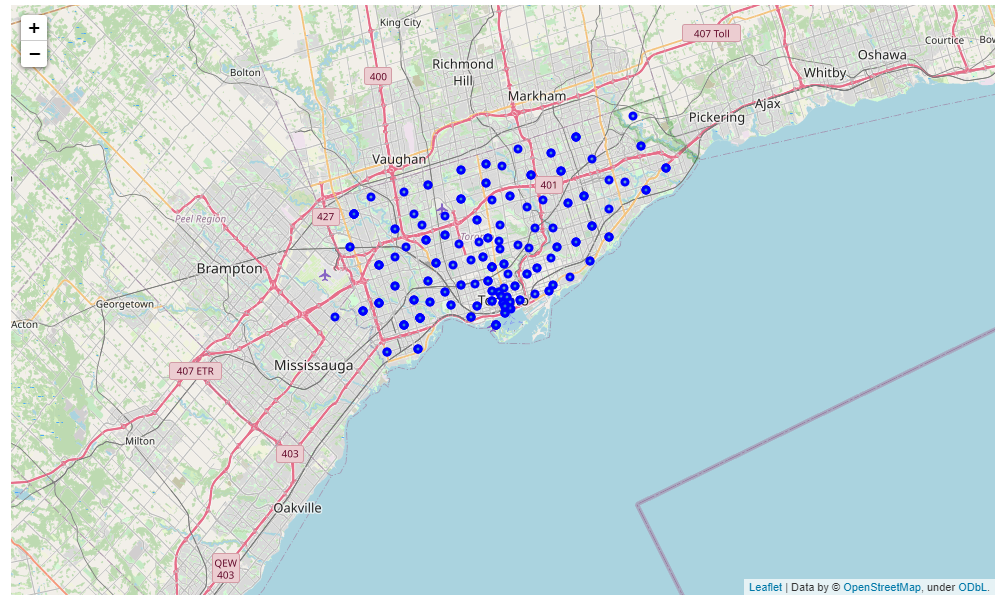

### Step 3
Step 3: By passing the latitude and longitude into Foursquare API, we can get venue information like <b>Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category

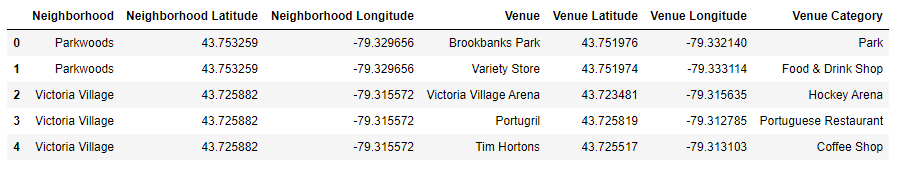

There are a total of 273 unique venue categories and 4342 venues in Toronto
<hr>

<div id="data_analysis">
    <h2>Data Analysis</h2>
</div>
Analyze each neighborhood and cluster each neighborhood in each city. 

let's group rows by neighborhood and by taking the sum and maximum of the frequency of occurrence of each category. 

<div id="common_venues">
    <h3>Find common venue categories to New York and Toronto</h3>
</div> 
Given a neighbourhood in New York, if a similar neighborhood needs to be found in Toronto, we need to consider all the similar venue categories to selected burough of New York and Toronto before grouping.

Toronto venues common to New York: 243 <br>
New York unique venue that will be discarded: 188 <br>
Toronto unique venues that will be discarded: 30 <br>

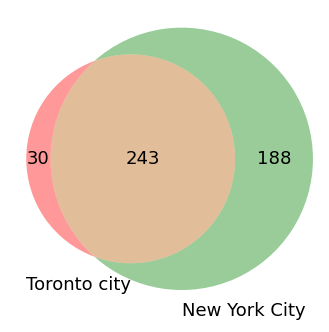

after cleaning the dataframe: <br>
Total venues in Toronto now: 4201<br>
Total venues in New York City now: 9233<br>

<div id="analyze_ny">
    <h4>Manhattan neighborhood</h4>
</div>
let's group rows by neighborhood and by taking the maximum of occurrence of each category, this gives the idea whether that venue is present (with value 1) or not (with value 0).

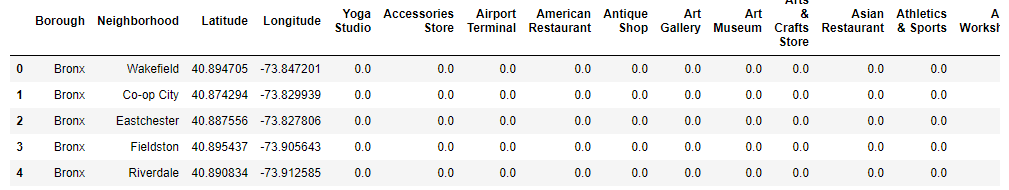

<div id="analyze_toronto">
    <h4>Toronto neighborhood</h4>
</div>


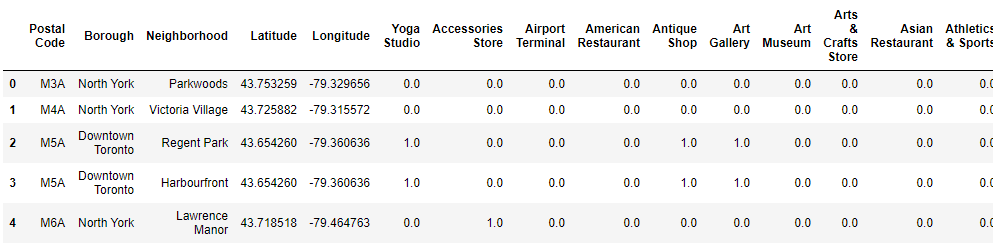

<div id="similar_neighborhood">
    <h2>Finding similar neighborhood</h2>
</div>

>Let's take an example of a place where a person currently resides in Downtown Toronto Regent Park and find a similar neighborhood in New York by cosine similarity

There are few ways to find out similar neighborhoods
<h4>Matrix Multiplication</h4>
    <div>This appoach will be used to amplify similar venue categories and discard dissimilar venue categories when comparing 2 neighborhoods</div>

For our problem we need to find NY neighborhoods with maximum maching categories with given neighborhood in Toronto and discard dissimilar venue categories

<div id="matrix_multiplication">
    <h3>Matrix Multiplication</h3>
</div>

Steps to get matching locations
1. isolate columns from dataframes to get common venue categories columns
2. multiply given index of toronto with transpose of ny data values
3. sort the dot product of matrices to get most matched 
4. save the matching locations into a dataframe

For example, if the person deciding to move NY is currently staying at Harbourfront, Downtown Toronto.<br>

The Index of this location in the toronto dataframe is 3<br>
Harbourfront location Latitude : 43.6542599<br>
Harbourfront location Longitude: -79.3606359<br>

<div id="result">
    <h2>Results</h2>
</div>

The top 5 locations in New York that match the Harbourfront, Downtown Toronto.<br>
The bar graph shows comparision of the venue categories and their number of occurances to the matched locations in New York. This gives a fair idea how each matched place is New York is close to the current living place in Toronto with number of categries matched as closely as possible.

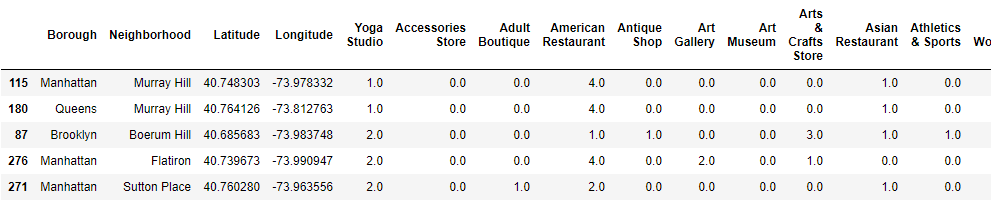


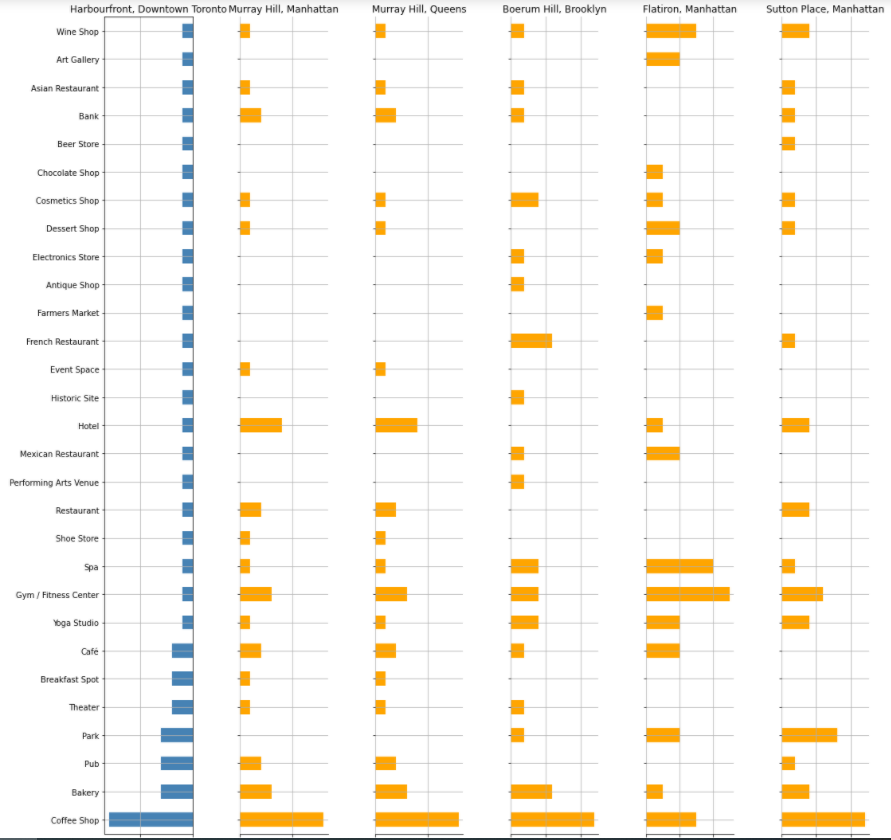


<div id="observation">
    <h2>Observations</h2>
</div>


The following observations are being made after analyzing the data above.

- New York has double in venue categories than Toronto.
- There are more Buroughs in Toronto than New York but there are more neighborhoods in New York than Toronto.

The matched locations observations are as follows: <br><br>
<u><b>Manhattan,Murray Hill</b></u>
- This location matches 9/10 most frequent venues in comparision to Toronto.
- Park is missing in this location but this neighborhood is the best match of all the matched locations.
- 11 venues that are missing in this location - Park,Performing Arts Venue,Mexican Restaurant,Historic Site,French Restaurant,Farmers Market,Antique Shop,Electronics Store,Chocolate Shop,Beer Store,Art Gallery
 
<u><b>Queens,Murray Hill</b></u>
- This location matches 9/10 most frequent venues in comparision to Toronto.
- Park is also missing in this location.
- 11 venues that are missing in this location - Park,Performing Arts Venue,Mexican Restaurant,Historic Site,French Restaurant,Farmers Market,Antique Shop,Electronics Store,Chocolate Shop,Beer Store,Art Gallery
 
<u><b>Brooklyn,Boerum Hill</b></u>
- This location matches 8/10 most frequent venues in comparision to Toronto.
- It has Park but no Pub and no Breakfast Spot. Although Breakfast spot is absent, there are Cafés and Restaurants and Coffee Shops in the area.
- 11 venues that are missing in this location - Pub,Breakfast Spot,Shoe Store,Restaurant,Hotel,Event Space,Farmers Market,Dessert Shop,Chocolate Shop,Beer Store,Art Gallery
 
<u><b>Manhattan,Flatiron</b></u>
- This location matches 7/10 most frequent venues in comparision to Toronto.
- It has Park but no Theater no Pub and no Breakfast Spot. Although Breakfast spot is absent, there are Cafés and Restaurants and Coffee Shops in the area. Pub and Theater is in the adjecent neighborhoods and comparitively New York neighborhoods are much closer compared to the Toronto.
- 13 venues that are missing in this location - Pub,Theater,Breakfast Spot,Shoe Store,Restaurant,Performing Arts Venue,Historic Site,Event Space,French Restaurant,Antique Shop,Beer Store,Bank,Asian Restaurant
 
<u><b>Manhattan,Sutton Place</b></u>
- This location matches 7/10 most frequent venues in comparision to Toronto.
- It doesn't have Café,Theater or Breakfast Spot. Although Breakfast spot is absent, there are Cafés and Restaurants and Coffee Shops in the area. Theater is in adjecent neighborhoods.
- 13 venues that are missing in this location - Theater,Breakfast Spot,Café,Shoe Store,Performing Arts Venue,Mexican Restaurant,Historic Site,Event Space,Farmers Market,Antique Shop,Electronics Store,Chocolate Shop,Art Gallery

Mapping of the matched locations using Folium

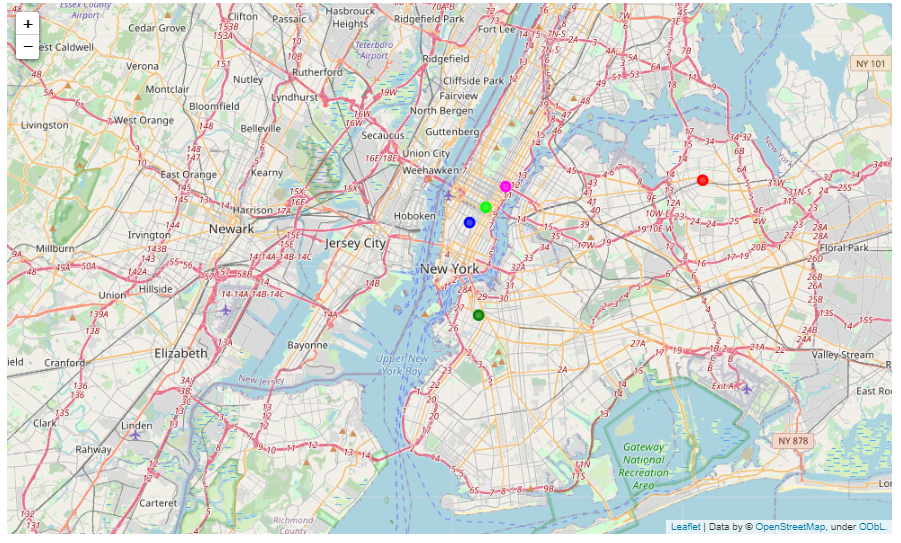

 <div id="conclusion">
    <h2>Conclusion</h2>
</div>

In this resport, I analyzed the relationship between neighborhoods and their venue categories in differnt cities New York and Toronto. I identified the latitude and longitude from different data sources and used Foursquare to retrieve all venues in the locations, using this information, I could list the most frequent locations for each neighborhood. This gave some idea on neighborhood characteristics that will be helpful to choose a location in New York, given the person is currently residing in Toronto. The Matrix multiplication methodology used eliminiates dissimilar venues and multiplies similar categories giving it a comparitive advantage over other methodologies. For example, according to the example used above, if a person is currently living in HarbourFront, Downtown Toronto, the best place to choose is Murray Hill, Manhattan in New York since it matches most venue categories with HarbourFront, Downtown Toronto according to the graph above. 